In [99]:
#The script requires the csv raw data under the relative path "../data/raw"
#Figures will be saved under "../figures"
#Resulting tables are saved under "../data/metafor"

#Load packages
#
library(ggpubr)
library(reshape2)
library(sm)
library(latex2exp)
library("RColorBrewer")


In [2]:
file_name<-"../data//raw/Crop_type.csv"
#Read input datafile 
df<-read.csv(file=file_name, header=TRUE, sep=",")

columns<-c("Cotton"
           ,"Peanut"
           ,"Maize"
           ,"Potato"
           ,"Tobacco"
           ,"Others"
          )
df_stacked<-na.omit(stack(df,select = columns,drop = TRUE))

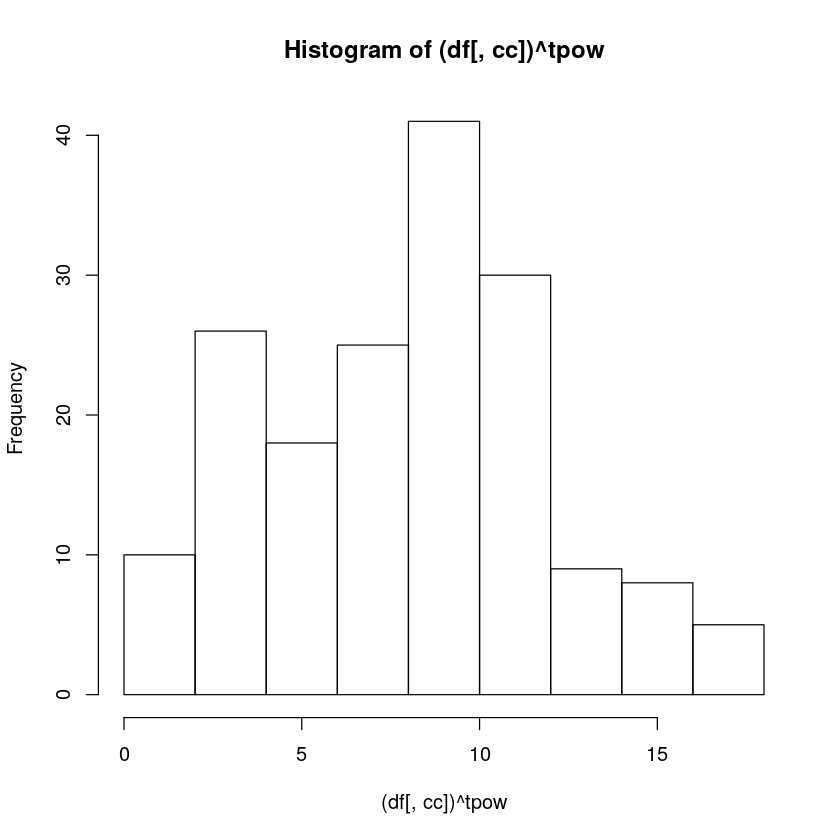

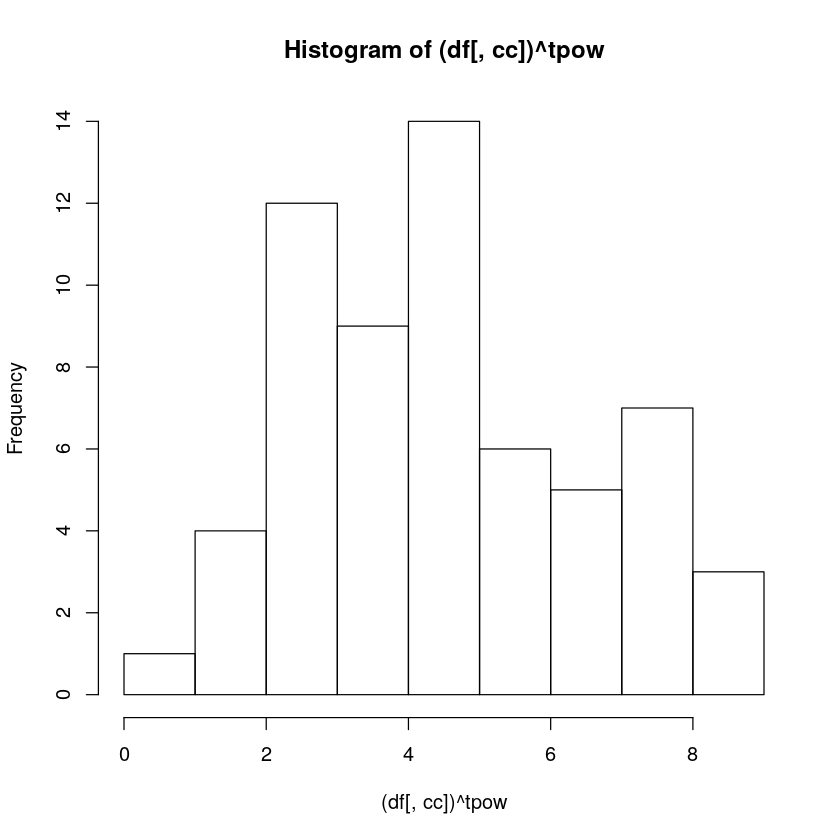

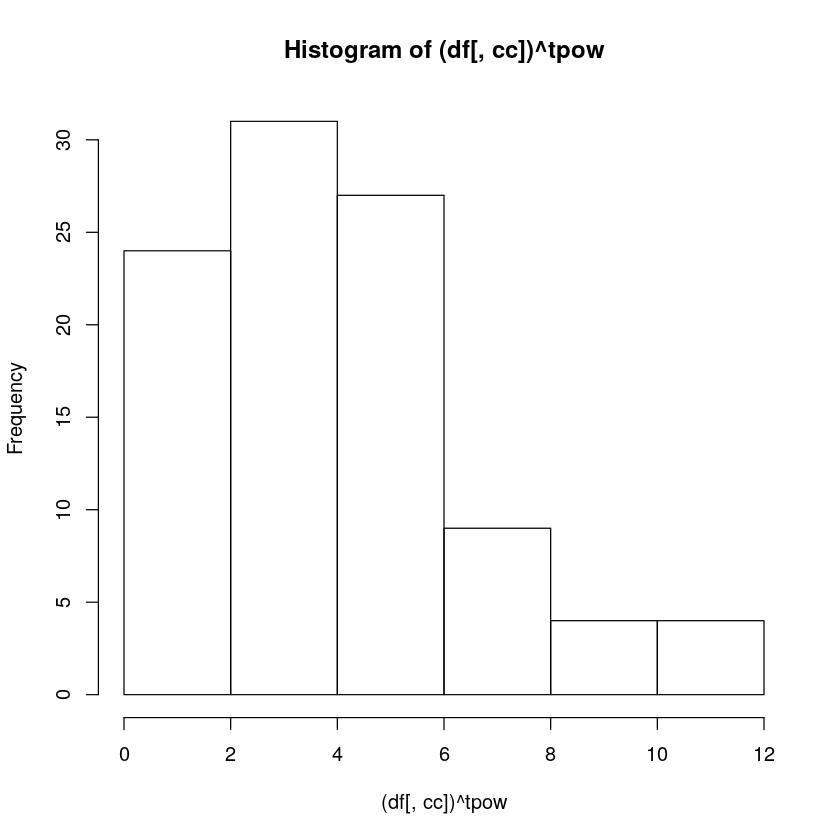

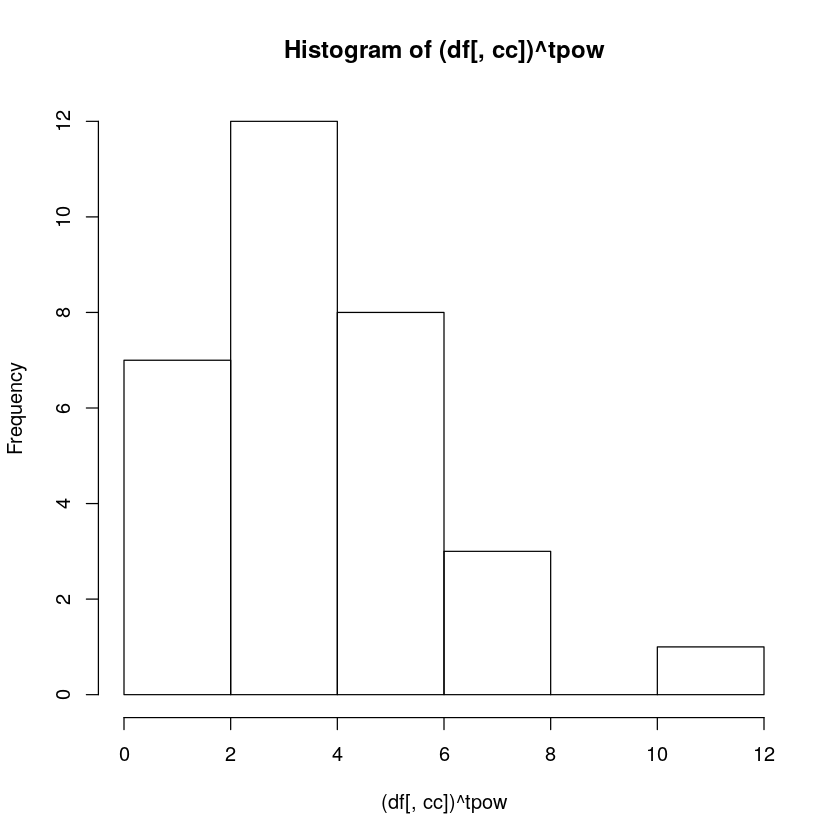

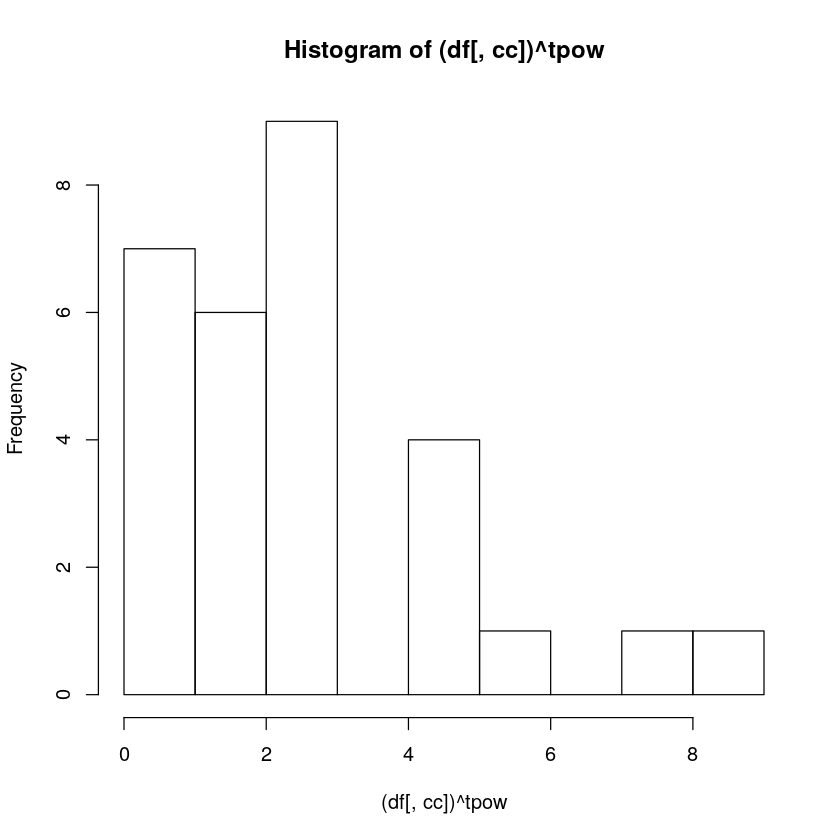

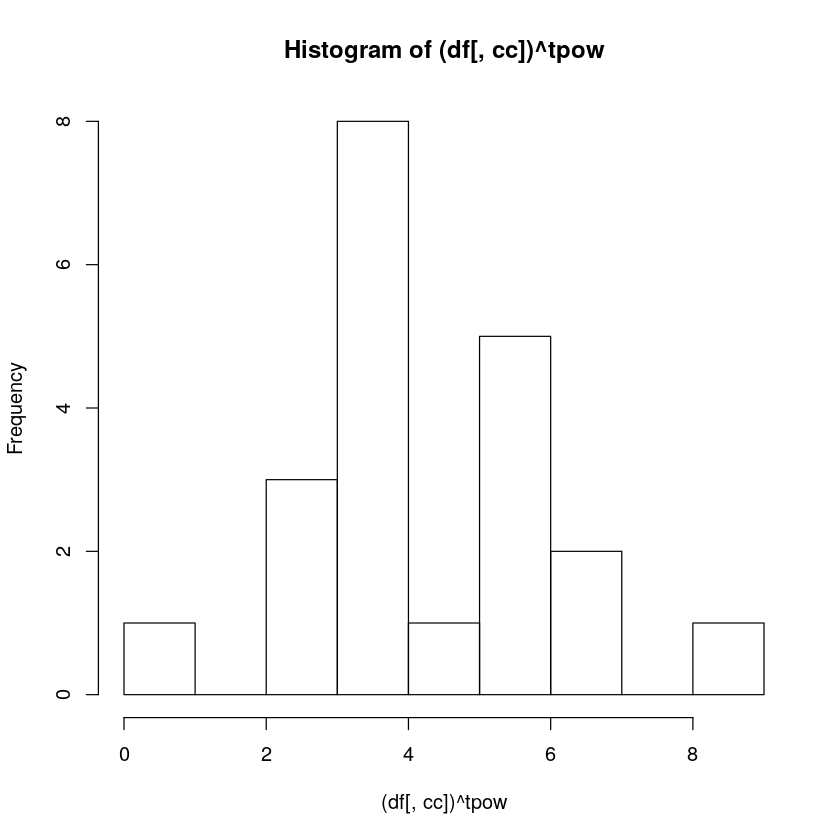

In [3]:
tpow<-0.5
for(cc in columns)
{
    hist((df[,cc])**tpow)
}

Warning message:
“Removed 136 rows containing non-finite values (stat_qq).”Warning message:
“Removed 136 rows containing non-finite values (stat_qq_line).”Warning message:
“Removed 136 rows containing non-finite values (stat_qq_line).”


	Shapiro-Wilk normality test

data:  (df[, cc])
W = 0.88352, p-value = 2.482e-10



Warning message:
“Removed 247 rows containing non-finite values (stat_qq).”Warning message:
“Removed 247 rows containing non-finite values (stat_qq_line).”Warning message:
“Removed 247 rows containing non-finite values (stat_qq_line).”

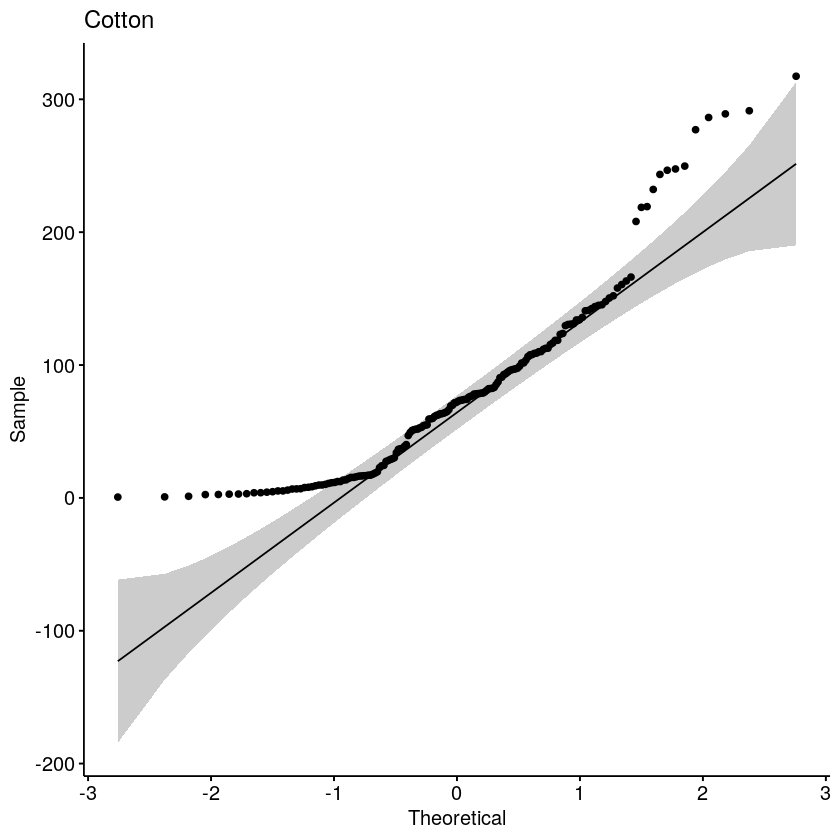


	Shapiro-Wilk normality test

data:  (df[, cc])
W = 0.8846, p-value = 3.3e-05



Warning message:
“Removed 209 rows containing non-finite values (stat_qq).”Warning message:
“Removed 209 rows containing non-finite values (stat_qq_line).”Warning message:
“Removed 209 rows containing non-finite values (stat_qq_line).”

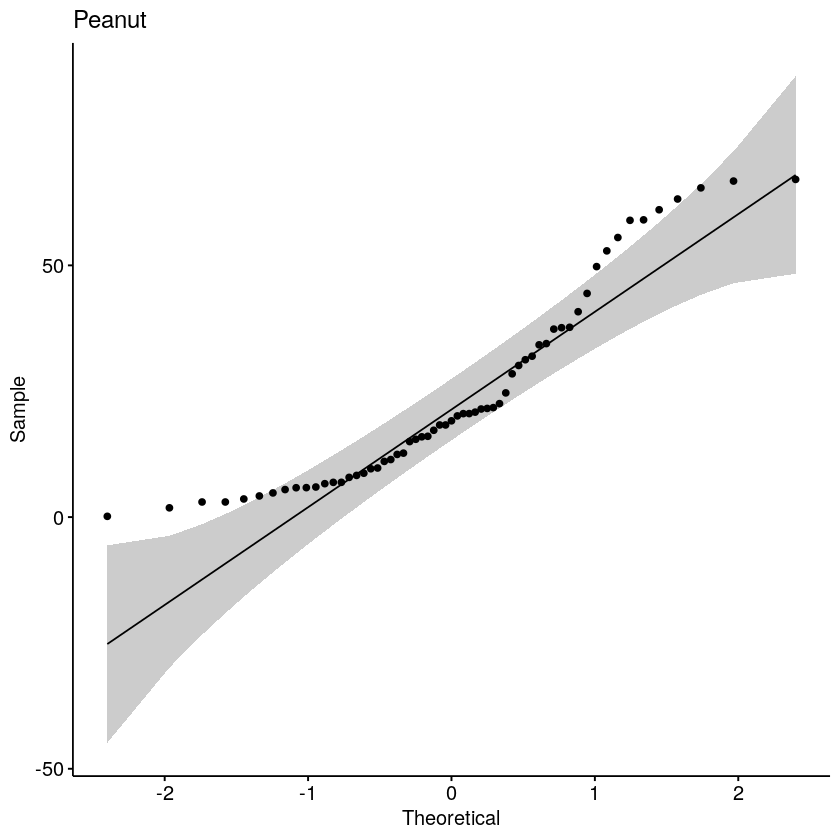


	Shapiro-Wilk normality test

data:  (df[, cc])
W = 0.70331, p-value = 7.582e-13



Warning message:
“Removed 277 rows containing non-finite values (stat_qq).”Warning message:
“Removed 277 rows containing non-finite values (stat_qq_line).”Warning message:
“Removed 277 rows containing non-finite values (stat_qq_line).”

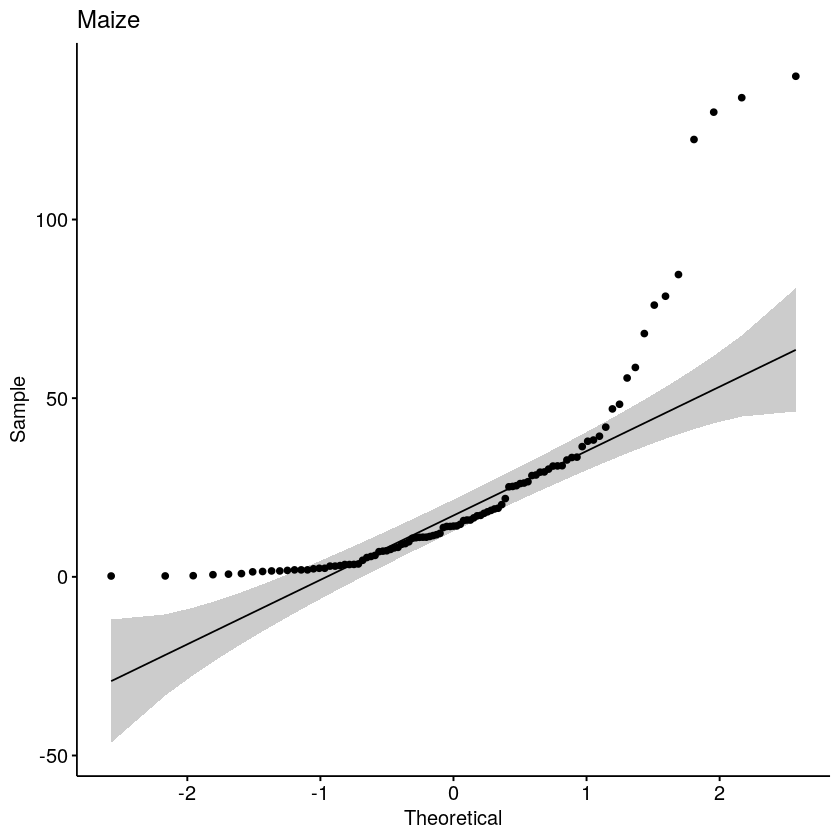


	Shapiro-Wilk normality test

data:  (df[, cc])
W = 0.66814, p-value = 4.068e-07



Warning message:
“Removed 279 rows containing non-finite values (stat_qq).”Warning message:
“Removed 279 rows containing non-finite values (stat_qq_line).”Warning message:
“Removed 279 rows containing non-finite values (stat_qq_line).”

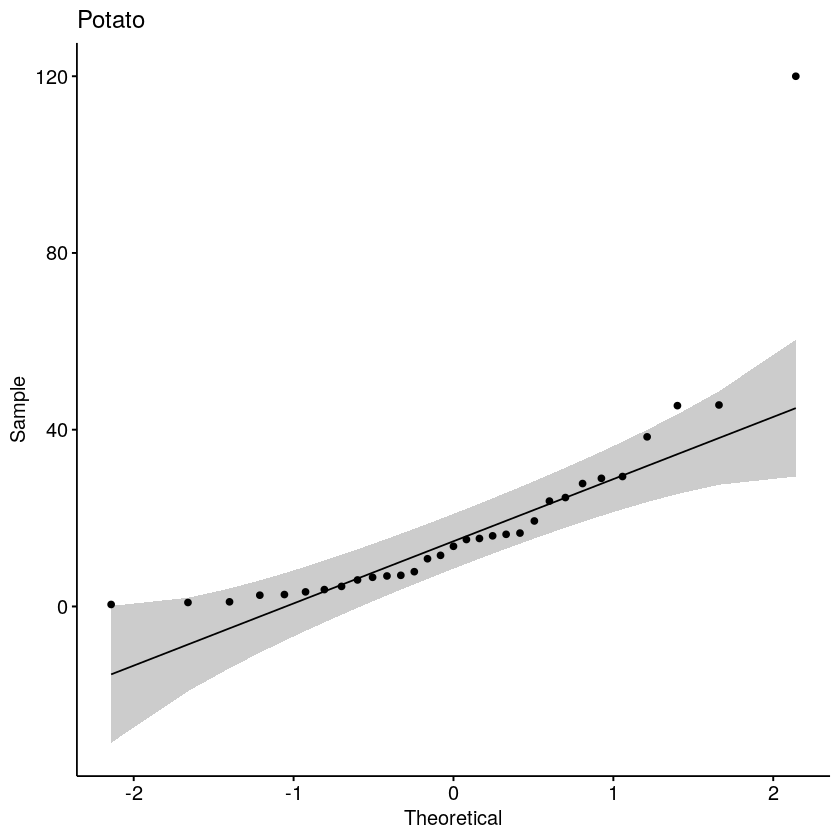


	Shapiro-Wilk normality test

data:  (df[, cc])
W = 0.62098, p-value = 1.855e-07



Warning message:
“Removed 287 rows containing non-finite values (stat_qq).”Warning message:
“Removed 287 rows containing non-finite values (stat_qq_line).”Warning message:
“Removed 287 rows containing non-finite values (stat_qq_line).”

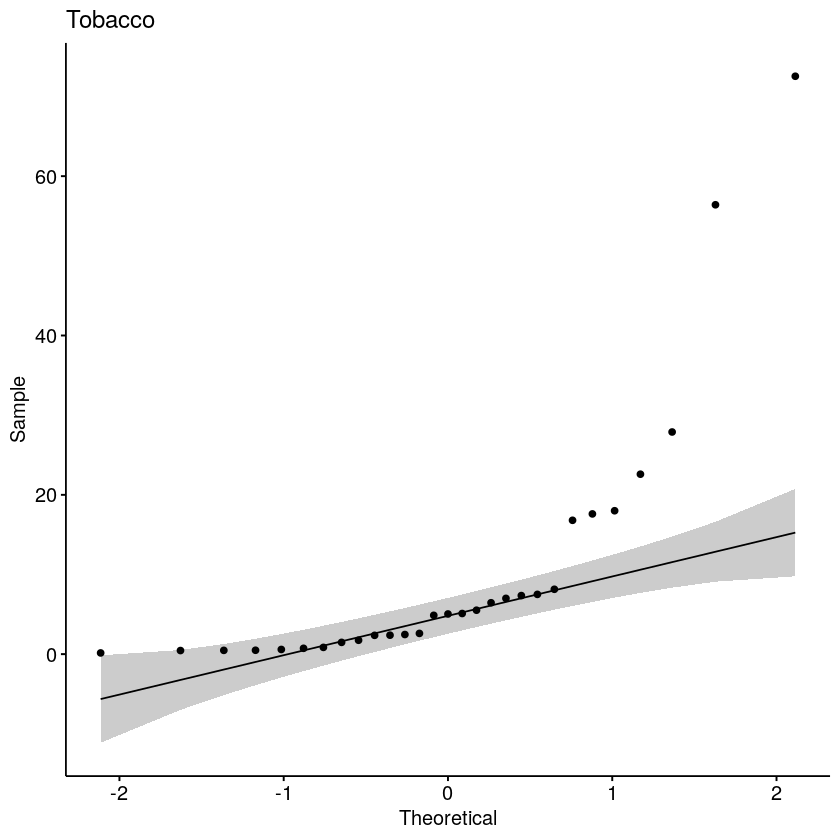


	Shapiro-Wilk normality test

data:  (df[, cc])
W = 0.87201, p-value = 0.01042



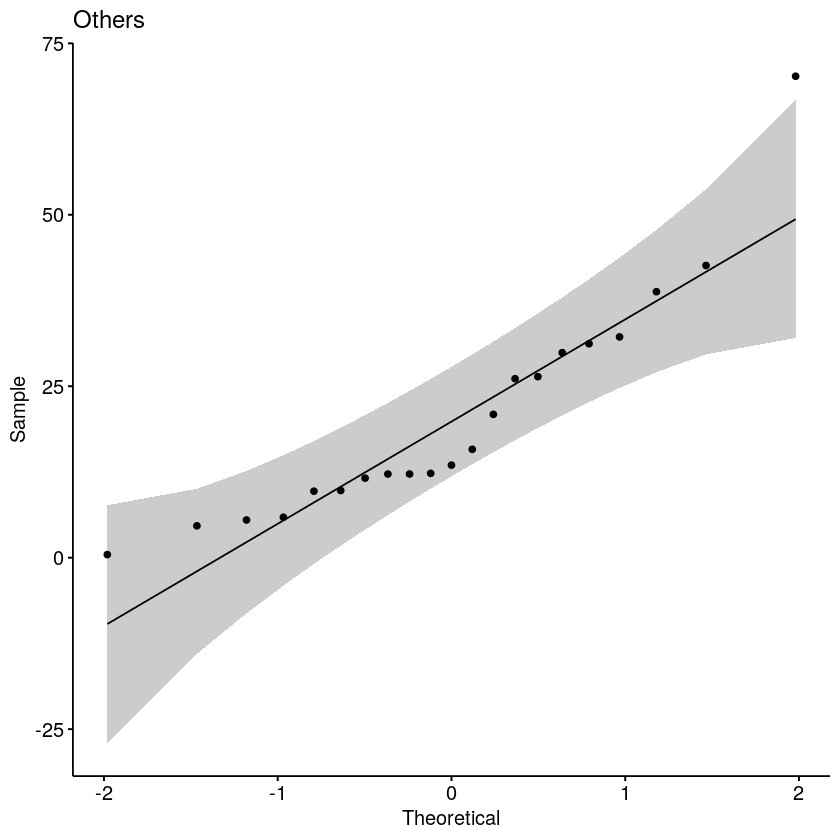

In [4]:
for(cc in columns)
{
    show(ggqqplot((df[,cc]),main=cc))
    show(shapiro.test((df[,cc])))

}


In [7]:
?kruskal.test

In [8]:
res.kruskal<-kruskal.test(values~ind,data = df_stacked)
res.kruskal


	Kruskal-Wallis rank sum test

data:  values by ind
Kruskal-Wallis chi-squared = 118.76, df = 5, p-value < 2.2e-16


In [9]:
summary(res.kruskal)

          Length Class  Mode     
statistic 1      -none- numeric  
parameter 1      -none- numeric  
p.value   1      -none- numeric  
method    1      -none- character
data.name 1      -none- character


Test of equal densities:  p-value =  0 


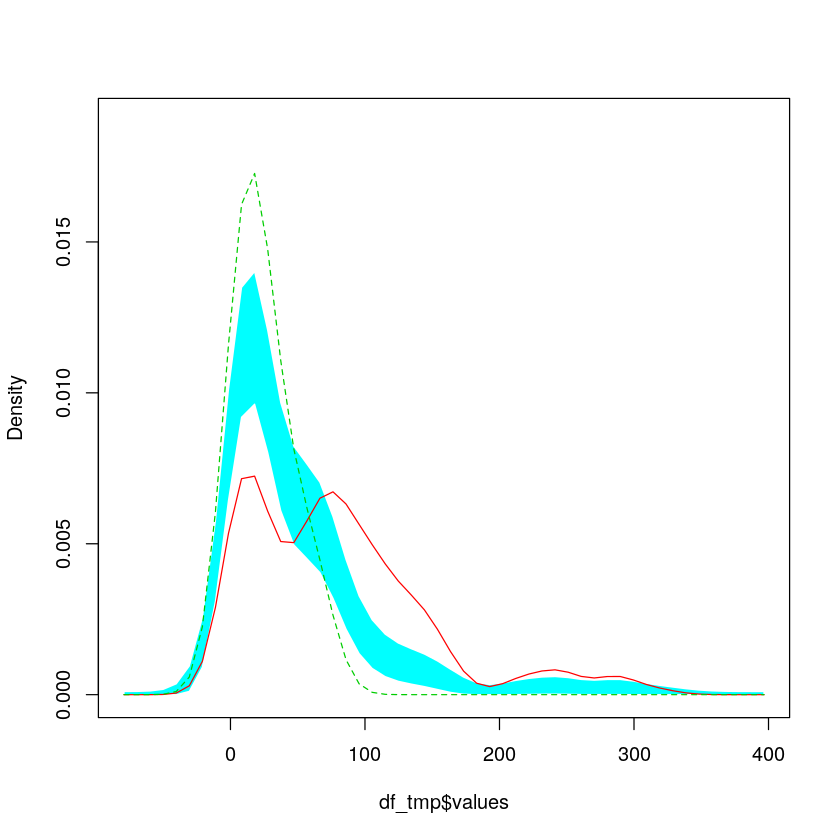


Test of equal densities:  p-value =  0 

Test of equal densities:  p-value =  0 

Test of equal densities:  p-value =  0 

Test of equal densities:  p-value =  0 

Test of equal densities:  p-value =  0 

Test of equal densities:  p-value =  0.09 

Test of equal densities:  p-value =  0.14 

Test of equal densities:  p-value =  0 

Test of equal densities:  p-value =  0.65 

Test of equal densities:  p-value =  0.76 

Test of equal densities:  p-value =  0 

Test of equal densities:  p-value =  0.58 


Warning message in wilcox.test.default(df[, cc], df[, dd]):
“cannot compute exact p-value with ties”Warning message in is.na(arg.value):
“is.na() applied to non-(list or vector) of type 'expression'”


Test of equal densities:  p-value =  0 


Warning message in wilcox.test.default(df[, cc], df[, dd]):
“cannot compute exact p-value with ties”Warning message in is.na(arg.value):
“is.na() applied to non-(list or vector) of type 'expression'”


Test of equal densities:  p-value =  0.43 


Warning message in wilcox.test.default(df[, cc], df[, dd]):
“cannot compute exact p-value with ties”Warning message in is.na(arg.value):
“is.na() applied to non-(list or vector) of type 'expression'”


Test of equal densities:  p-value =  0 


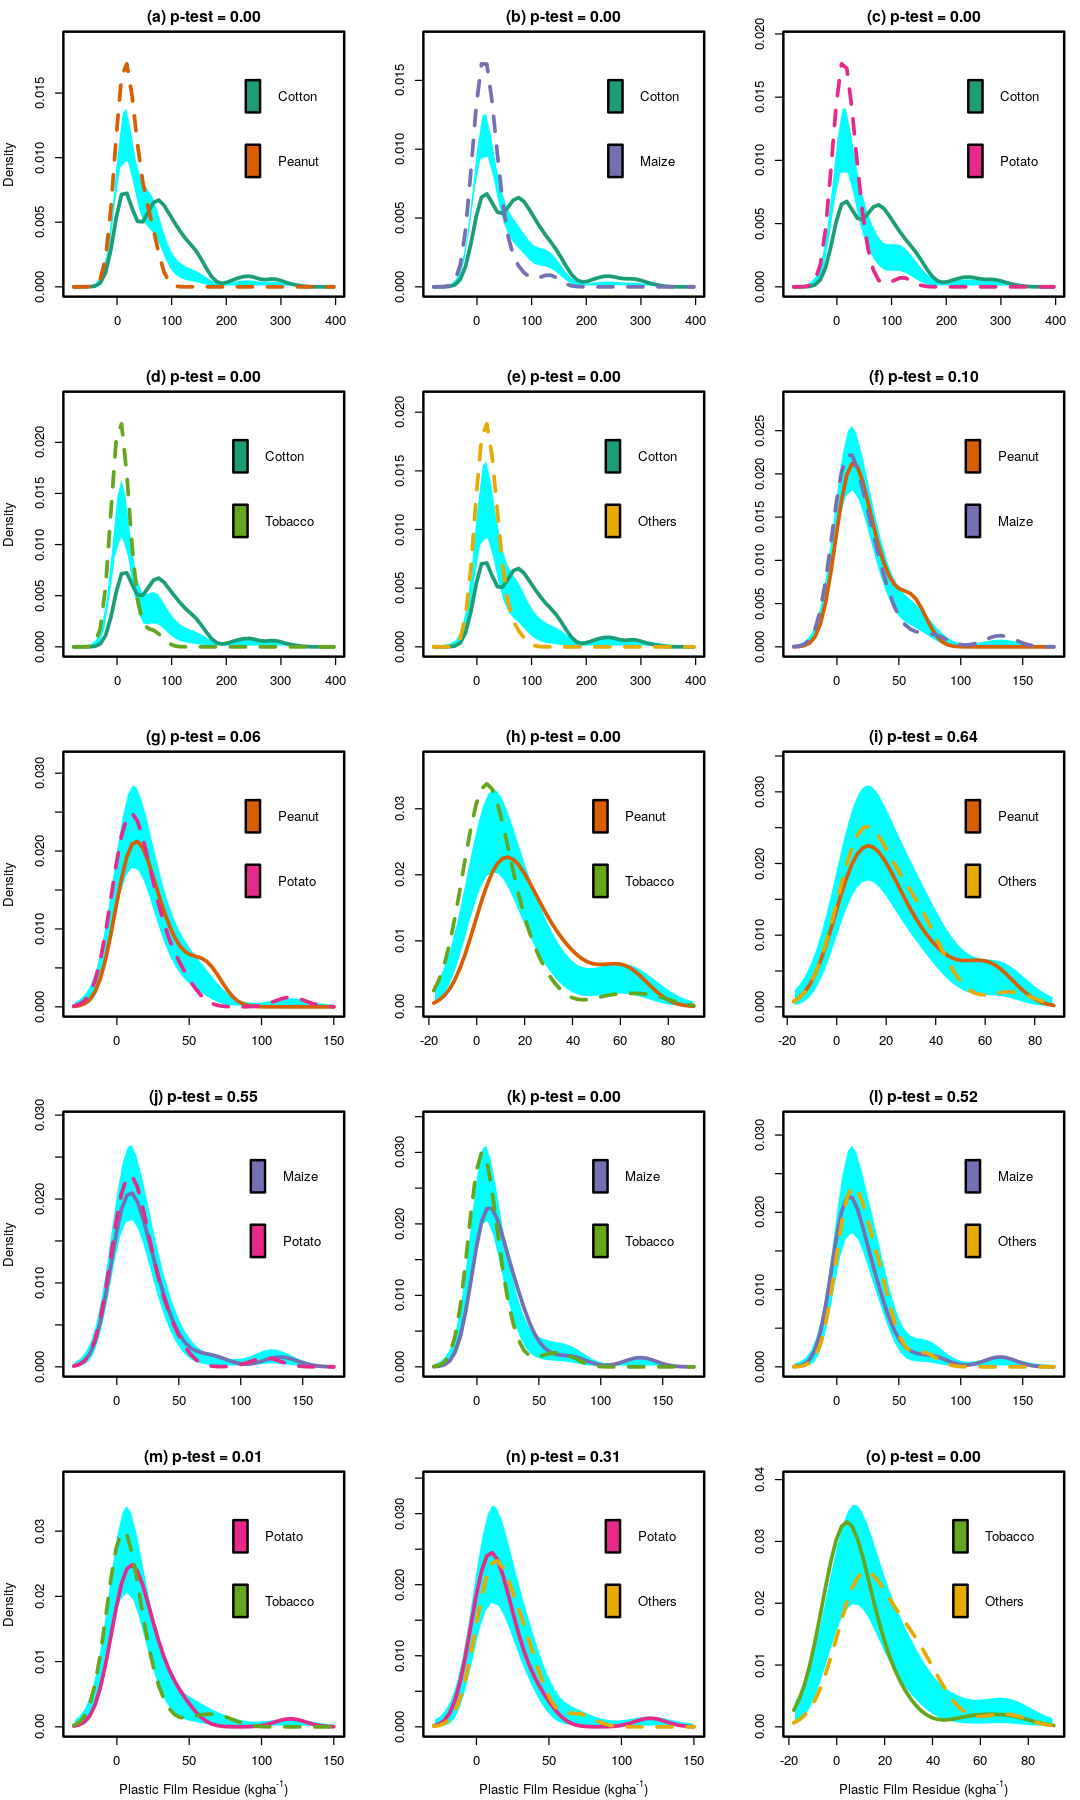

In [111]:
options(repr.plot.width=9, repr.plot.height=15)

#plot setup 
par(mfrow=c(5,3)
    ,mar=c(4,4,2,1)
    ,lwd=2
    #,cex.lab=1.3
    #,cex.axis = 1.25
    #,cex=0.8
   )
res.test<-data.frame()

nc=length(columns)

indx<-1
colours <- brewer.pal(n = 8, name = "Dark2")

for(i in seq(from = 1,to = nc)){
    for(j in seq(from = 1,to = nc)){
        if(j<=i){next}
        cc<-columns[i]
        dd<-columns[j]
        res.wilcox <- wilcox.test(df[,cc],df[,dd])
        res.test<-rbind(res.test,data.frame(d1=cc,d2=dd,p=res.wilcox$p.value))
        df_tmp<-df_stacked[is.element(df_stacked$ind, c(cc,dd)),]
                
        sm.density.compare(x=df_tmp$values
                           , group=df_tmp$ind
                           , mode="equal"
                           ,col=c(colours[i],colours[j])
                           ,col.palette = "green"
                           ,ylab=ifelse(indx%%3==1,"Density","")
                           ,xlab=ifelse(indx>12,TeX("Plastic Film Residue ($kg ha^{-1}$)"),"")
                           ,lwd=3
                          )
        title(main=sprintf("(%s) p-test = %0.2f",letters[indx],res.wilcox$p.value))
        legend("topright"
               , legend = unique(df_tmp$ind)
               , fill=c(colours[i],colours[j])
               ,cex=1
               ,bty = "n"
              )
        indx<-indx+1
    }
}



In [105]:
res.table<-round(100*acast(res.test,d1~d2,value.var="p"),digits = 1)
res.table[is.na(res.table)]<-""
res.table

,Peanut,Maize,Potato,Tobacco,Others
Cotton,0,0,0,0,0
Peanut,,10.3,6.1,0,64
Maize,,,54.6,0.1,51.8
Potato,,,,1.4,30.9
Tobacco,,,,,0.2


In [57]:
levels(df_tmp$ind)#, fill=2+(0:nlevels(df_tmp$ind)

[1] "Cotton"  "Peanut"  "Maize"   "Potato"  "Tobacco" "Others"

In [84]:
?sm.options

In [96]:
 sm.density.compare

function (x, group, h, model = "none", ...) 
{
    if (!is.vector(x)) 
        stop("sm.density.compare can handle only 1-d data")
    opt <- sm.options(list(...))
    replace.na(opt, ngrid, 50)
    replace.na(opt, display, "line")
    replace.na(opt, xlab, deparse(substitute(x)))
    replace.na(opt, ylab, "Density")
    replace.na(opt, xlim, c(min(x) - diff(range(x))/4, max(x) + 
        diff(range(x))/4))
    replace.na(opt, eval.points, seq(opt$xlim[1], opt$xlim[2], 
        length = opt$ngrid))
    if (is.na(opt$band)) {
        if (model == "none") 
            opt$band <- FALSE
        else opt$band <- TRUE
    }
    if ((model == "none") && opt$band) 
        opt$band <- FALSE
    band <- opt$band
    ngrid <- opt$ngrid
    xlim <- opt$xlim
    nboot <- opt$nboot
    y <- x
    if (is.na(opt$test)) {
        if (model == "none") 
            opt$test <- FALSE
        else opt$test <- TRUE
    }
    if ((model == "none") && opt$test) 
        opt$test <- FALSE
    test <- opt$test
    if (opt$display %in% "none") 
        band <- FALSE
    fact <- factor(group)
    fact.levels <- levels(fact)
    nlev <- length(fact.levels)
    ni <- table(fact)
    if (band & (nlev > 2)) {
        cat("Reference band available to compare two groups only.", 
            "\n")
        band <- FALSE
    }
    if (length(opt$lty) < nlev) 
        opt$lty <- 1:nlev
    if (length(opt$col) < nlev) 
        opt$col <- 2:(nlev + 1)
    if (missing(h)) 
        h <- h.select(x, y = NA, group = group, ...)
    opt$band <- band
    opt$test <- test
    estimate <- matrix(0, ncol = opt$ngrid, nrow = nlev)
    se <- matrix(0, ncol = opt$ngrid, nrow = nlev)
    for (i in 1:nlev) {
        sm <- sm.density(y[fact == fact.levels[i]], h = h, display = "none", 
            eval.points = opt$eval.points)
        estimate[i, ] <- sm$estimate
        se[i, ] <- sm$se
    }
    eval.points <- sm$eval.points
    if (!(opt$display %in% "none" | band)) {
        replace.na(opt, yht, 1.1 * max(as.vector(estimate)))
        replace.na(opt, ylim, c(0, opt$yht))
        plot(xlim, opt$ylim, xlab = opt$xlab, ylab = opt$ylab, 
            type = "n")
        for (i in 1:nlev) lines(eval.points, estimate[i, ], lty = opt$lty[i], 
            col = opt$col[i], lwd = opt$lwd)
    }
    est <- NULL
    p <- NULL
    if (model == "equal" & test) {
        if (nlev == 2) {
            ts <- sum((estimate[1, ] - estimate[2, ])^2)
        }
        else {
            sm.mean <- sm.density(y, h = h, xlim = opt$xlim, 
                ngrid = opt$ngrid, display = "none")$estimate
            ts <- 0
            for (i in 1:nlev) ts <- ts + ni[i] * sum((estimate[i, 
                ] - sm.mean)^2)
        }
        p <- 0
        est.star <- matrix(0, ncol = opt$ngrid, nrow = nlev)
        for (iboot in 1:nboot) {
            ind <- (1:length(y))
            for (i in 1:nlev) {
                indi <- sample((1:length(ind)), ni[i])
                est.star[i, ] <- sm.density(y[ind[indi]], h = h, 
                  ngrid = opt$ngrid, xlim = opt$xlim, display = "none")$estimate
                ind <- ind[-indi]
            }
            if (nlev == 2) {
                ts.star <- sum((est.star[1, ] - est.star[2, ])^2)
            }
            else {
                sm.mean <- sm.density(y, h = h, xlim = opt$xlim, 
                  ngrid = opt$ngrid, display = "none")$estimate
                ts.star <- 0
                for (i in 1:nlev) {
                  ts.star <- ts.star + ni[i] * sum((est.star[i, 
                    ] - sm.mean)^2)
                }
            }
            if (ts.star > ts) 
                p <- p + 1
            if (opt$verbose > 1) {
                cat(iboot)
                cat(" ")
            }
        }
        p <- p/nboot
        cat("\nTest of equal densities:  p-value = ", round(p, 
            3), "\n")
        est <- list(p = p, estimaate = estimate, eval.points = eval.points, 
            h = h)
    }
    if (model == "equal" & band) {
    